In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('shot_logs.csv')

In [3]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [5]:
# Convert all column names to lowercase for ease of typing
df.columns = df.columns.str.lower()

In [6]:
df['shot_result']

0           made
1         missed
2         missed
3         missed
4         missed
           ...  
128064    missed
128065      made
128066      made
128067    missed
128068      made
Name: shot_result, Length: 128069, dtype: object

In [7]:
df.isnull().sum()

game_id                          0
matchup                          0
location                         0
w                                0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5567
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

In [8]:
df.dropna(axis=1, inplace =True)

In [9]:
df['matchup']
df['game_clock']
df['touch_time'].min()

-163.6

####Dropping Outliers

##### A touch time of 163.6 is not possible. There're probably outliers in the touch_time column

<Axes: ylabel='touch_time'>

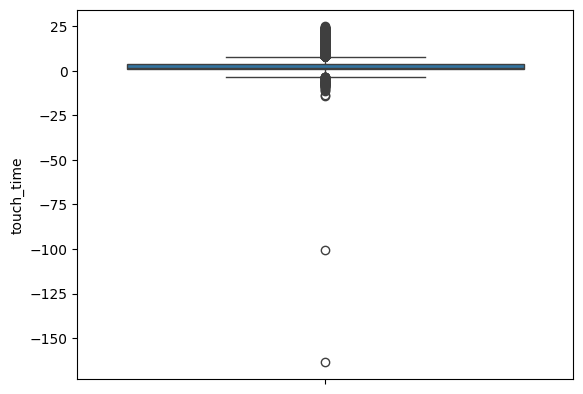

In [10]:
sns.boxplot(df['touch_time'])

In [11]:
Q1 = df['touch_time'].quantile(0.25)
Q3 = df['touch_time'].quantile(0.75)

IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

0.9
3.7
2.8000000000000003


In [12]:
Lower_Whisker = Q1 -  1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-3.3000000000000003 7.9


In [13]:
outliers = df[(df.touch_time < Lower_Whisker) | (df.touch_time > Upper_Whisker)]

In [14]:
df = df.drop(outliers.index)

<Axes: ylabel='touch_time'>

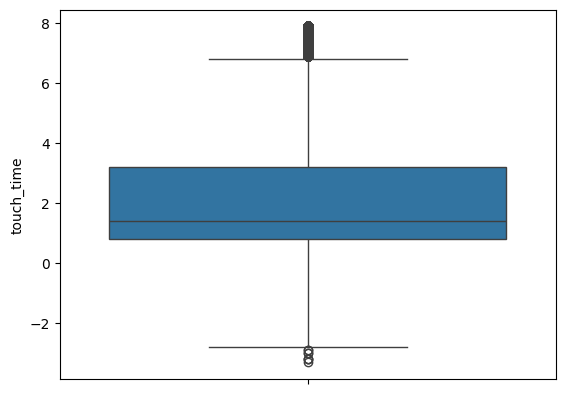

In [15]:
sns.boxplot(df['touch_time'])

In [16]:
Q1 = df['touch_time'].quantile(0.25)
Q3 = df['touch_time'].quantile(0.75)

IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

0.8
3.2
2.4000000000000004


In [17]:
Lower_Whisker = Q1 -  1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-2.8000000000000007 6.800000000000001


In [18]:
outliers = df[(df.touch_time < Lower_Whisker) | (df.touch_time > Upper_Whisker)]


In [19]:
df = df.drop(outliers.index)

<Axes: ylabel='touch_time'>

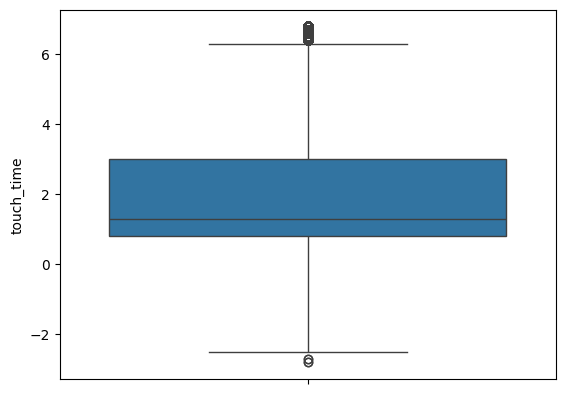

In [20]:
sns.boxplot(df['touch_time'])

#### There are still outliers in the dataset. Since it's impossible to have a negative touch time, we remove touch times less than 0

In [21]:
outliers = df[(df.touch_time < 0)]

In [22]:
df = df.drop(outliers.index)

<Axes: ylabel='touch_time'>

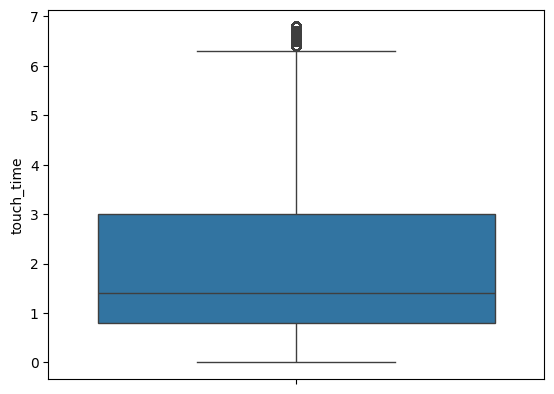

In [23]:
sns.boxplot(df['touch_time'])

In [24]:
df['location'].value_counts()

location
H    58370
A    58101
Name: count, dtype: int64

In [25]:
#df['home_game'] = np.where(df['location'] == 'H', 1, 0)
df['location'] = np.where(df['location'] == 'H', 1, 0)

In [26]:
#df['game_won'] = np.where(df['w'] == 'W', 1, 0)
df['w'] = np.where(df['w'] == 'W', 1, 0)

In [27]:
#df['w'] = np.where(df['w'] == 'W', 1, 0)

In [28]:
df.shot_result = df.shot_result.map({"made":1,"missed":0})

In [29]:
# converting the game_clock values to the seconds
df.game_clock = df.game_clock.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116471 entries, 0 to 128068
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_id                     116471 non-null  int64  
 1   matchup                     116471 non-null  object 
 2   location                    116471 non-null  int64  
 3   w                           116471 non-null  int64  
 4   final_margin                116471 non-null  int64  
 5   shot_number                 116471 non-null  int64  
 6   period                      116471 non-null  int64  
 7   game_clock                  116471 non-null  int64  
 8   dribbles                    116471 non-null  int64  
 9   touch_time                  116471 non-null  float64
 10  shot_dist                   116471 non-null  float64
 11  pts_type                    116471 non-null  int64  
 12  shot_result                 116471 non-null  int64  
 13  closest_defender   

In [31]:
df['pts'].value_counts()

pts
0    63338
2    41772
3    11361
Name: count, dtype: int64

In [32]:
df['matchup']

0         MAR 04, 2015 - CHA @ BKN
1         MAR 04, 2015 - CHA @ BKN
2         MAR 04, 2015 - CHA @ BKN
3         MAR 04, 2015 - CHA @ BKN
4         MAR 04, 2015 - CHA @ BKN
                    ...           
128064    OCT 29, 2014 - BKN @ BOS
128065    OCT 29, 2014 - BKN @ BOS
128066    OCT 29, 2014 - BKN @ BOS
128067    OCT 29, 2014 - BKN @ BOS
128068    OCT 29, 2014 - BKN @ BOS
Name: matchup, Length: 116471, dtype: object

In [33]:
# Extract game date and convert to datetime object
df['date'] = df['matchup'].str[:12]
df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y')

In [34]:
df = df.set_index('date')

In [35]:
#df = df.drop(columns = ['game_id', 'matchup', 'closest_defender', 'closest_defender_player_id', 'player_name', 'player_id'])

In [36]:
df = df.sort_index()

In [37]:
df

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
date,,,,,,,,,,,,,,,,,,,,
2014-10-28,21400001,"OCT 28, 2014 - NOP vs. ORL",1,1,17,17,3,341,1,2.1,0.9,2,1,"O'Quinn, Kyle",203124,1.3,1,2,anthony davis,203076
2014-10-28,21400002,"OCT 28, 2014 - SAS vs. DAL",1,1,1,4,2,533,4,5.0,6.0,2,1,"Aminu, Al-Farouq",202329,2.2,1,2,marco belinelli,201158
2014-10-28,21400002,"OCT 28, 2014 - SAS vs. DAL",1,1,1,5,2,15,0,0.7,25.6,3,0,"Ellis, Monta",101145,5.3,0,0,marco belinelli,201158
2014-10-28,21400002,"OCT 28, 2014 - SAS vs. DAL",1,1,1,6,3,684,3,3.5,24.0,3,0,"Parsons, Chandler",202718,7.6,0,0,marco belinelli,201158
2014-10-28,21400002,"OCT 28, 2014 - SAS vs. DAL",1,1,1,7,3,579,0,0.7,24.2,3,1,"Ellis, Monta",101145,4.5,1,3,marco belinelli,201158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-04,21400905,"MAR 04, 2015 - MIA vs. LAL",1,1,6,2,1,605,2,2.7,3.7,2,1,"Clarkson, Jordan",203903,39.3,1,2,dwayne wade,2548
2015-03-04,21400905,"MAR 04, 2015 - MIA vs. LAL",1,1,6,1,1,652,1,1.1,3.4,2,0,"Sacre, Robert",203135,3.5,0,0,dwayne wade,2548
2015-03-04,21400905,"MAR 04, 2015 - MIA vs. LAL",1,1,6,8,4,483,0,1.0,4.7,2,0,"Lin, Jeremy",202391,2.9,0,0,chris andersen,2365


In [38]:
#all_players = list(df['player_name'].unique())

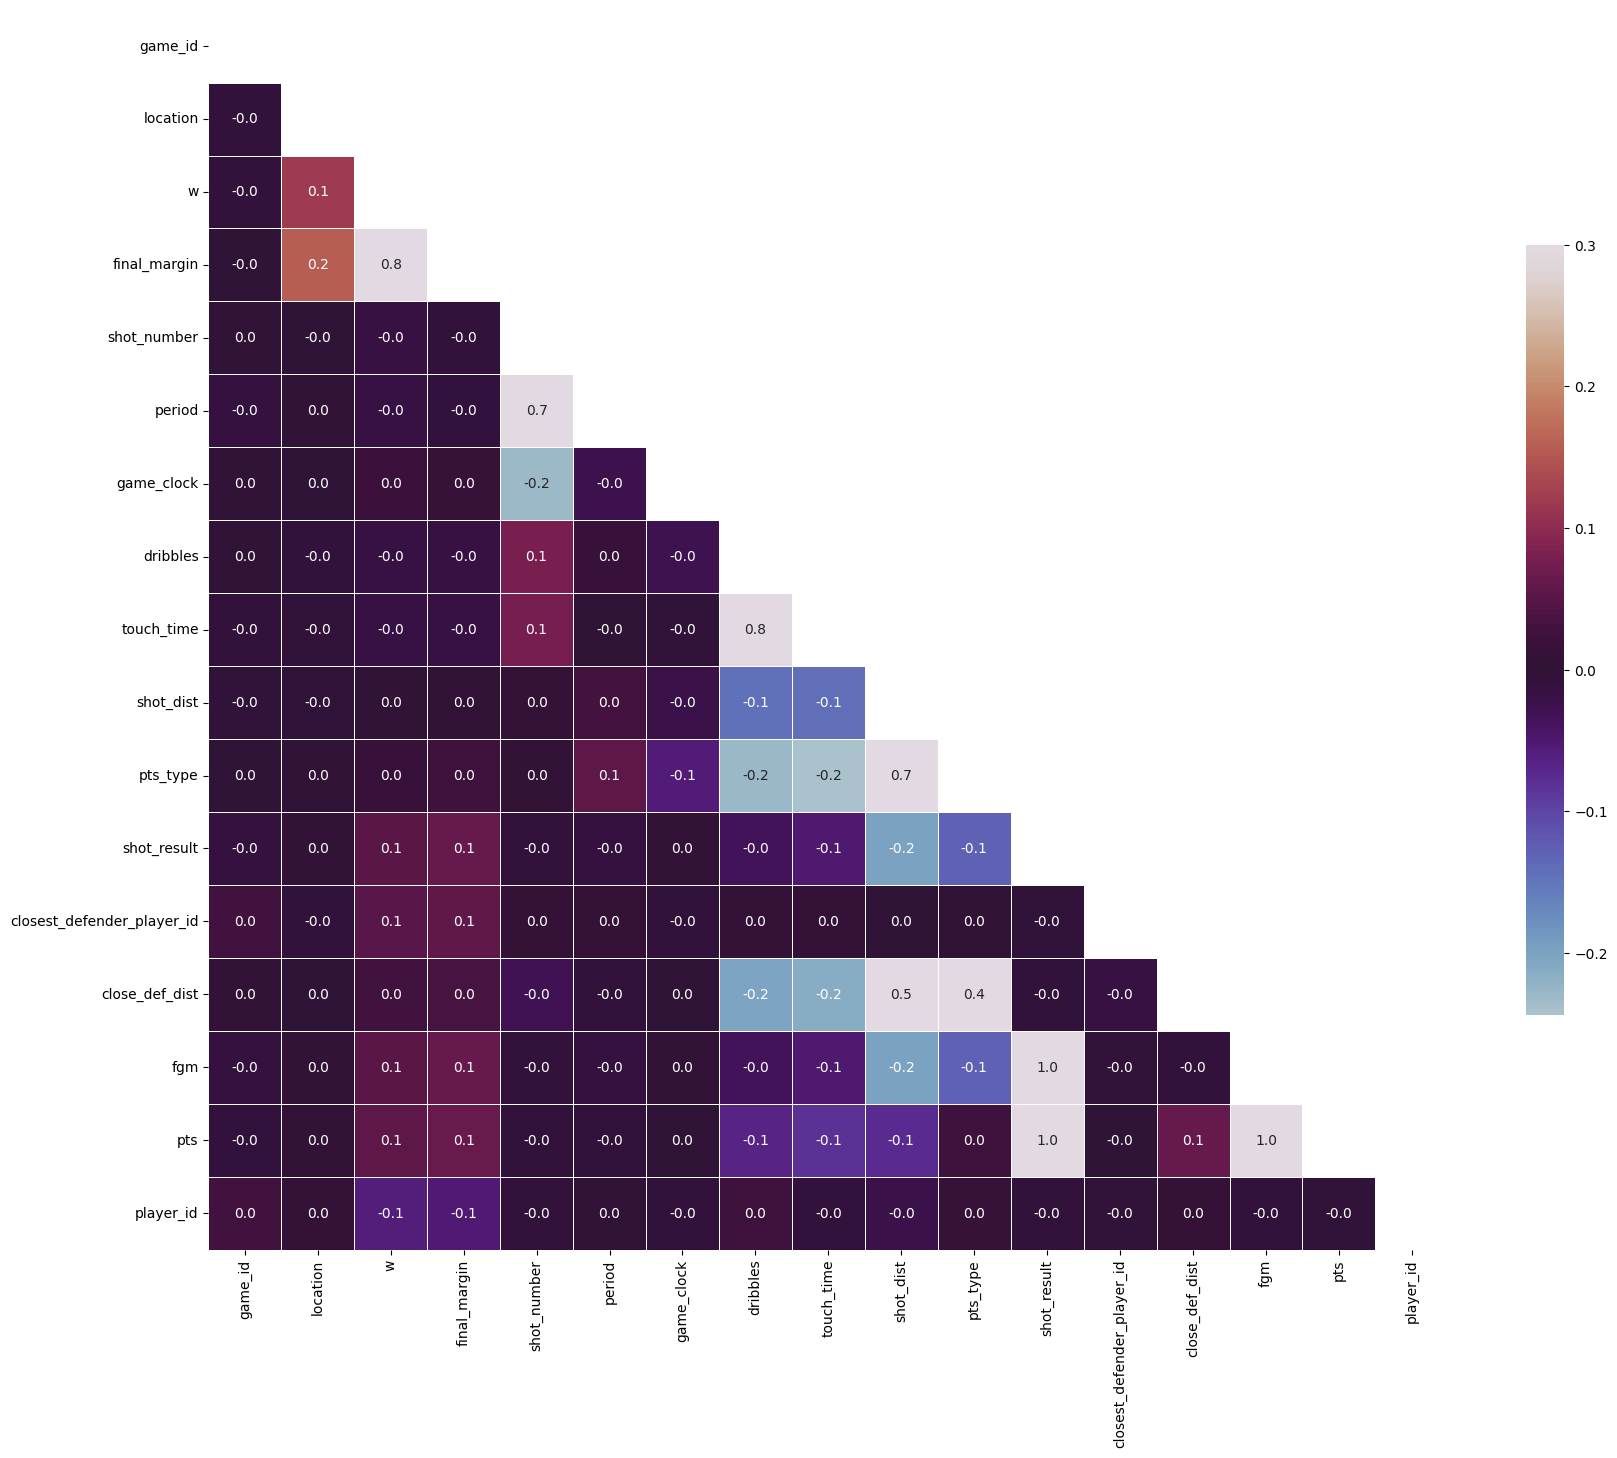

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".1f", mask=mask, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [40]:
df = df.drop(columns = ['player_id', 'player_name','matchup', 'game_id', 'closest_defender_player_id', 'closest_defender', 'fgm', 'pts'], axis=1)

Drop irrelevant and highly correlated Columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116471 entries, 2014-10-28 to 2015-03-04
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   location        116471 non-null  int64  
 1   w               116471 non-null  int64  
 2   final_margin    116471 non-null  int64  
 3   shot_number     116471 non-null  int64  
 4   period          116471 non-null  int64  
 5   game_clock      116471 non-null  int64  
 6   dribbles        116471 non-null  int64  
 7   touch_time      116471 non-null  float64
 8   shot_dist       116471 non-null  float64
 9   pts_type        116471 non-null  int64  
 10  shot_result     116471 non-null  int64  
 11  close_def_dist  116471 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 11.6 MB


In [42]:
df['shot_result'].value_counts()

shot_result
0    63338
1    53133
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X  = df.drop('shot_result', axis=1)
y = df['shot_result']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [46]:
print(X_train.dtypes)

location            int64
w                   int64
final_margin        int64
shot_number         int64
period              int64
game_clock          int64
dribbles            int64
touch_time        float64
shot_dist         float64
pts_type            int64
close_def_dist    float64
dtype: object


/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy: 0.6116421498483201
Train accuracy: 0.6098198187148132
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     19069
           1       0.59      0.49      0.53     15873

    accuracy                           0.61     34942
   macro avg       0.61      0.60      0.60     34942
weighted avg       0.61      0.61      0.61     34942



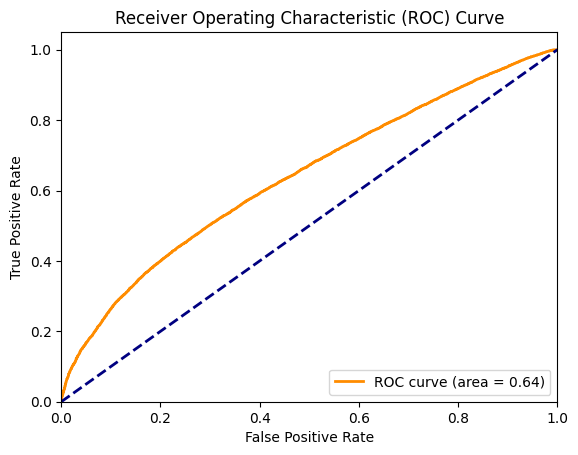

Confusion Matrix:
[[13572  5497]
 [ 8073  7800]]

Crosstab:
Predicted      0      1    All
Actual                        
0          13572   5497  19069
1           8073   7800  15873
All        21645  13297  34942


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# Identify the categorical column
categorical_columns = ['w']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.columns.drop('w')),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ])

# Create a pipeline with the preprocessor and the logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate scores
print('Test accuracy:', pipeline.score(X_test, y_test))
print('Train accuracy:', pipeline.score(X_train, y_train))

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Crosstab
print("\nCrosstab:")
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Random Forest

Random Forest

Gradient Boosting

In [48]:
target_names = (['made', 'missed'])

In [49]:
target_names = np.array(target_names)

In [50]:
import alibi

/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
pip install alibi


Note: you may need to restart the kernel to use updated packages.


In [52]:
from alibi.explainers import ALE, plot_ale
from alibi.explainers.ale import ALE, plot_ale

#### ALE on Logistic Regression in logit space

In [71]:
from sklearn.linear_model import LogisticRegression

# Define and train the logistic regression model
logistic = LogisticRegression()

# Assuming X_train and y_train are your training data
logistic.fit(X_train, y_train)

# Now you can use the decision_function
logit_fun_lr = logistic.decision_function(X_test)


/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
logit_fun_lr = logistic.decision_function

In [73]:
logit_ale_lr = ALE(logit_fun_lr, feature_names=X.columns)

In [74]:
logit_exp_lr = logit_ale_lr.explain(X_train.values)

/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fit

In [55]:
print("Columns in X_train:", X_train.columns.tolist())
print("Expected columns:", ['w', 'location', 'final_margin', 'pts_type', 'period', 'game_clock', 'dribbles', 'close_def_dist', 'shot_number', 'shot_dist', 'touch_time'])

Columns in X_train: ['location', 'w', 'final_margin', 'shot_number', 'period', 'game_clock', 'dribbles', 'touch_time', 'shot_dist', 'pts_type', 'close_def_dist']
Expected columns: ['w', 'location', 'final_margin', 'pts_type', 'period', 'game_clock', 'dribbles', 'close_def_dist', 'shot_number', 'shot_dist', 'touch_time']


In [56]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(81529, 11)


In [57]:
pipeline.fit(X_train, y_train)

/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['location', 'final_margin', 'shot_number', 'period', 'game_clock',
       'dribbles', 'touch_time', 'shot_dist', 'pts_type', 'close_def_dist'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['w'])])),
                ('classifier', LogisticRegression())])

In [58]:
#logit_ale_lr = ALE(logit_fun_lr, feature_names=X.columns, target_names=target_names)

In [59]:
model = LogisticRegression()

In [60]:
# Replace 'your_model' with the actual name of your model or pipeline
if hasattr(model, 'fit'):
    print("Model has a fit method.")
    if hasattr(model, 'predict'):
        print("Model also has a predict method, suggesting it might be fitted.")
    else:
        print("Model doesn't have a predict method, it might not be fitted.")
else:
    print("This doesn't seem to be a scikit-learn model or pipeline.")

Model has a fit method.
Model also has a predict method, suggesting it might be fitted.


In [75]:
logistic.fit(X_train, y_train)

/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
print(hasattr(logistic, 'coef_'))

True


In [77]:
logit_fun_lr = logistic.predict_proba

In [78]:
from alibi.explainers import ALE

ale_explainer = ALE(logit_fun_lr, feature_names=X_train.columns.tolist())

In [79]:
import pandas as pd
X_train = pd.DataFrame(X_train)


In [80]:
X_train.reset_index(drop=True, inplace=True)


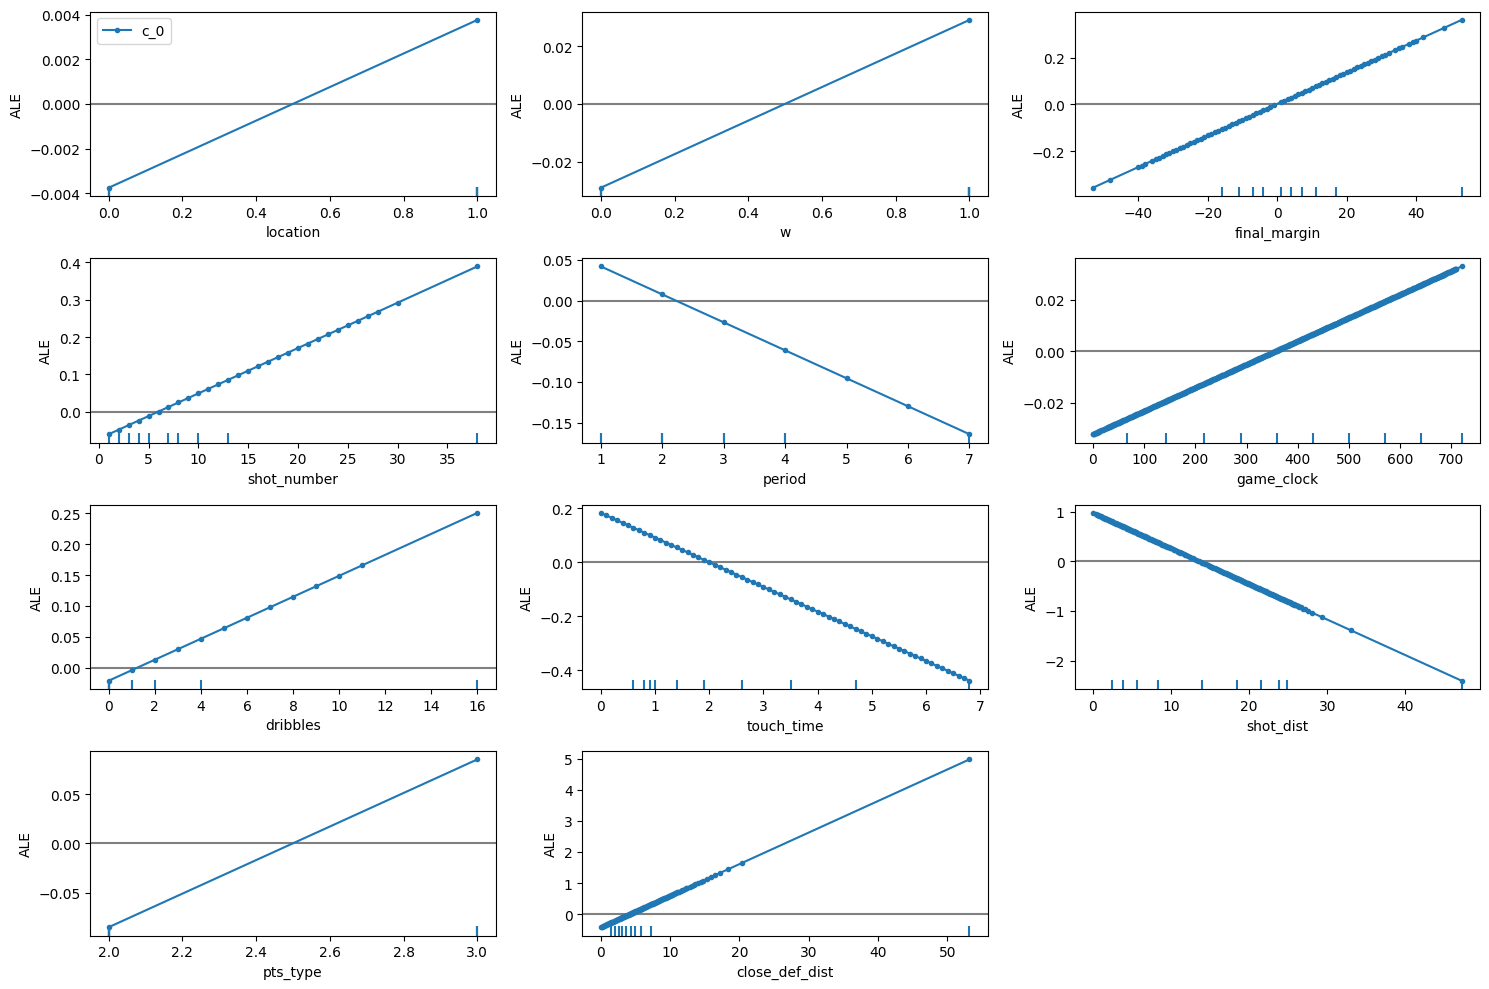

In [82]:
plot_ale(logit_exp_lr, fig_kw={'figwidth': 15, 'figheight': 10}, sharey=None);

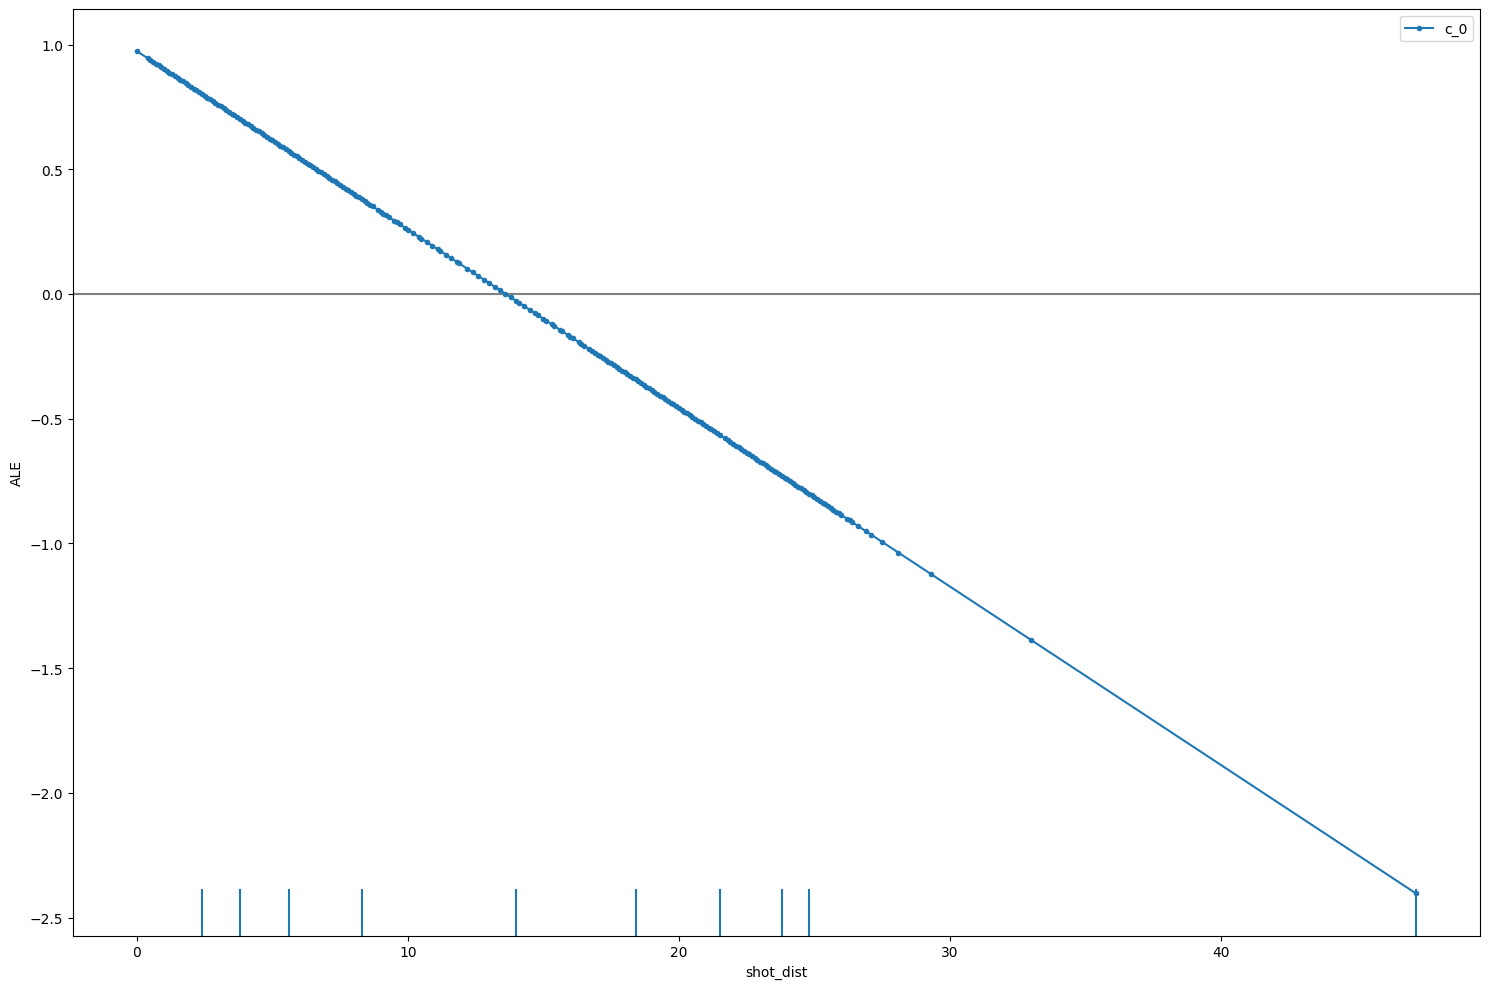

In [83]:
plot_ale(logit_exp_lr, features = ['shot_dist'], fig_kw={'figwidth': 15, 'figheight': 10}, sharey=None);

In [84]:
#plot_ale(logit_exp_lr)

#### ALE on Logistic Regression in probability space

In [85]:
proba_fun_lr = logistic.predict_proba

In [87]:
#proba_ale_lr = ALE(proba_fun_lr, feature_names=df.columns, target_names=target_names)
proba_ale_lr = ALE(proba_fun_lr, feature_names=X.columns)

In [88]:
proba_exp_lr = proba_ale_lr.explain(X_train.values)

/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fit

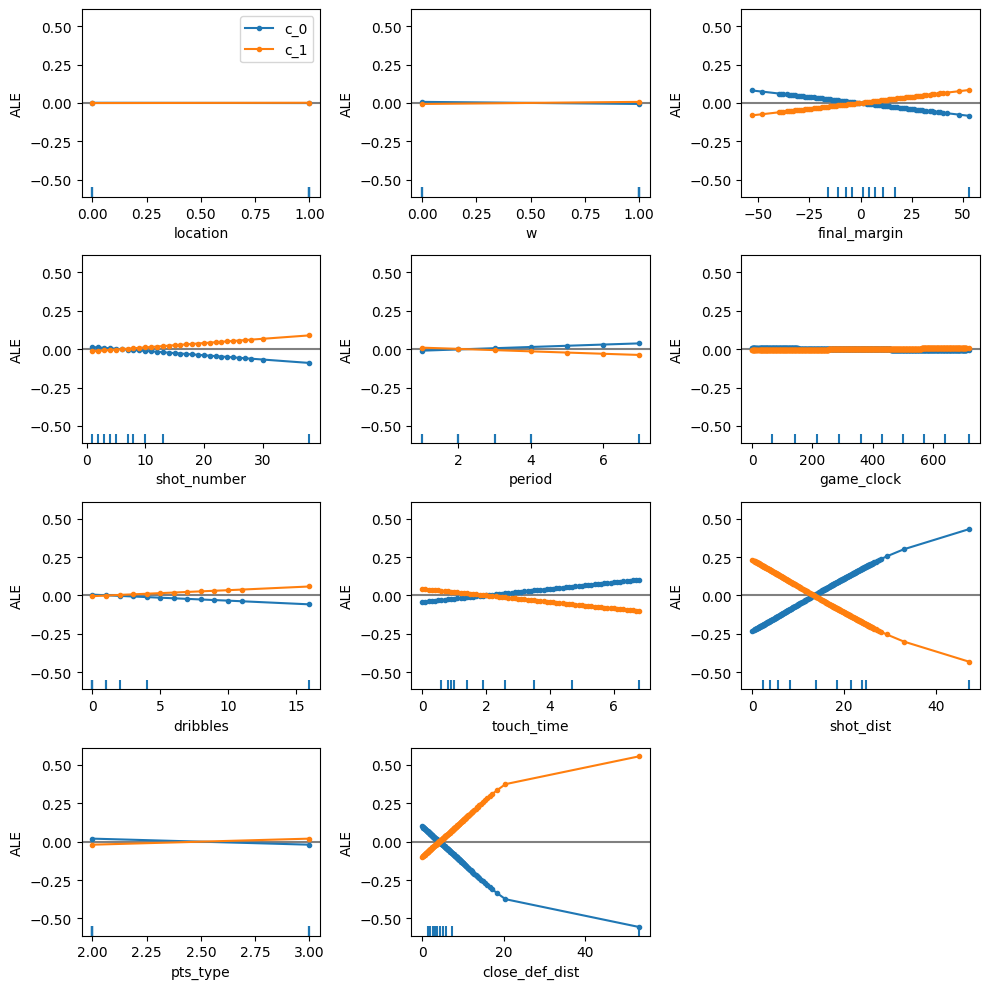

In [89]:
plot_ale(proba_exp_lr, fig_kw={'figwidth': 10, 'figheight': 10});

### Comparing ALE between models

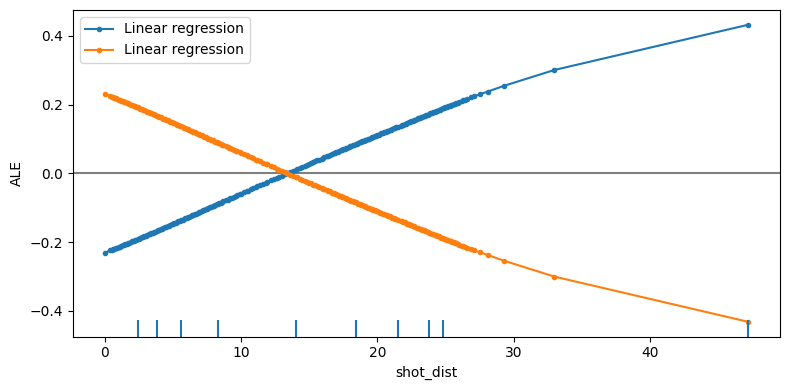

In [91]:
fig, ax = plt.subplots(1,1 , figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=['shot_dist'], ax=ax, line_kw={'label': 'Linear regression'});

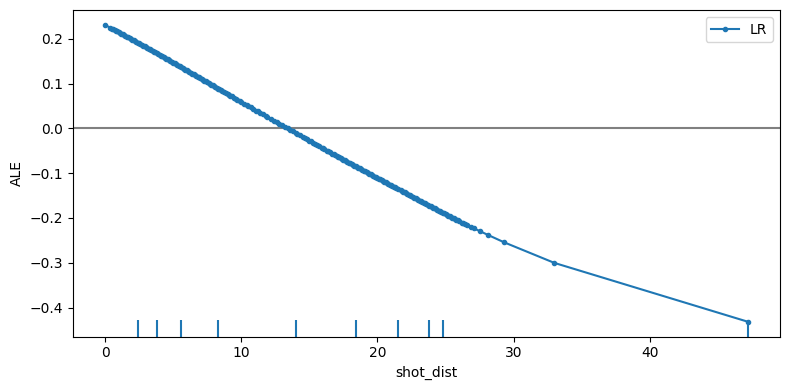

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=['shot_dist'], targets=[1], ax=ax, line_kw={'label': 'LR'});

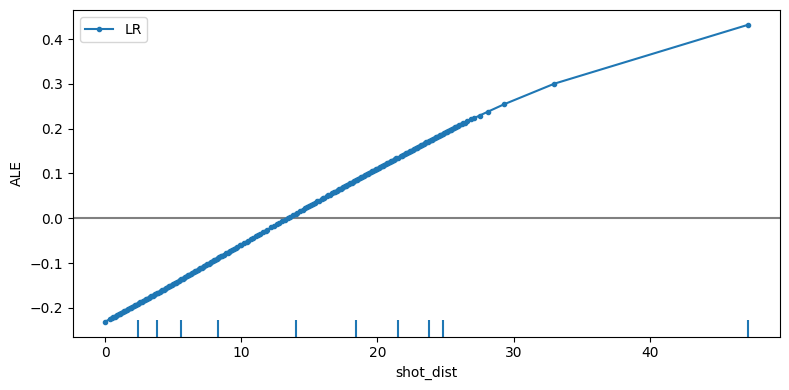

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=['shot_dist'], targets=[0], ax=ax, line_kw={'label': 'LR'});

In [98]:
pip install 'alibi-detect[tensorflow]'


Python(41103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached tensorflow_probability-0.22.1-py2.py3-none-any.whl.metadata (13 kB)
INFO: pip is looking at multiple versions of alibi-detect[tensorflow] to determine which version is compatible with other requirements. This could take a while.
  Using cached alibi_detect-0.11.5-py3-none-any.whl.metadata (28 kB)
  Using cached pydantic-1.10.18-cp312-cp312-macosx_11_0_arm64.whl.metadata (152 kB)
  Using cached numba-0.58.1.tar.gz (2.6 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/05/lg75x1x52xgbqgzbzdvhjrd00000gn/T/pip-install-3tj1oocb/numba_014096f63ae840ad930f8be34de696a0/setup.py", line 51, in <module>
          _guard_py_ver()
        File "/private/var/folders/05/lg75

In [102]:
pip install pyod


Python(41213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=71f602aa9faf3142ed3f6c57d3fda0e30ae77422d07de26101cbc1cc897fdd75
  Stored in directory: /Users/sarthakagrawal/Library/Caches/pip/wheels/55/d5/d0/40d872fd90314ea8c097c6f3cc2f59c4dbdf97732a4db0117a
Successfully built pyod
Note: you may need to restart the kernel to use updated packages.


In [105]:
import numpy as np
from sklearn.datasets import make_classification
from pyod.models.knn import KNN

# Set random seed for reproducibility
np.random.seed(0)

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Function to create an outlier batch
def create_outlier_batch(X, y, n_samples, perc_outlier):
    n_outliers = int(n_samples * perc_outlier / 100)
    n_normals = n_samples - n_outliers
    
    # Sample normal data
    normal_data = X[y == 0]
    if len(normal_data) < n_normals:
        sampled_normals = normal_data  # Use all available if not enough
    else:
        sampled_normals = normal_data[np.random.choice(normal_data.shape[0], n_normals, replace=False)]
    
    # Sample outlier data
    outlier_data = X[y == 1]
    if len(outlier_data) < n_outliers:
        sampled_outliers = outlier_data  # Use all available if not enough
    else:
        sampled_outliers = outlier_data[np.random.choice(outlier_data.shape[0], n_outliers, replace=False)]
    
    return np.vstack([sampled_normals, sampled_outliers]), np.array([0] * len(sampled_normals) + [1] * len(sampled_outliers))

# Create an outlier batch (normal data)
normal_batch = create_outlier_batch(X, y, n_samples=100000, perc_outlier=0)
X_train, y_train = normal_batch

# Standardize the data (optional but recommended)
mean, stdev = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mean) / stdev

# Load Outlier Detector (KNN)
od = KNN()

# Train the model
od.fit(X_train)

# Assume we have some data which we know contains around 20% outliers
perc_outlier = 20
threshold_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=perc_outlier)
X_threshold, y_threshold = threshold_batch
X_threshold = (X_threshold - mean) / stdev
print('{}% outliers'.format(100 * y_threshold.mean()))

# Generate a batch of data with 10% outliers and detect them
np.random.seed(1)
outlier_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=10)
X_outlier, y_outlier = outlier_batch
X_outlier = (X_outlier - mean) / stdev
print(X_outlier.shape, y_outlier.shape)
print('{}% outliers'.format(100 * y_outlier.mean()))

# Predict outliers
od_preds = od.predict(X_outlier)
od_scores = od.decision_scores_  # Get the decision scores for the predictions

# Display predictions
print('Predictions (1 = outlier, 0 = normal):', od_preds)
print('Decision scores:', od_scores)


Python(41247) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


28.368794326241137% outliers
(605, 20) (605,)
16.528925619834713% outliers
Predictions (1 = outlier, 0 = normal): [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

Assume that a model is trained on normal instances of the dataset (not outliers) and standardization is applied:

In [108]:
mean, stdev = X_train.mean(axis=0), X_train.std(axis=0)

Apply standardization:

In [107]:
X_train = (X_train - mean) / stdev

### Load Outlier Detector (Isolation Forest)

Let’s assume we have some data which we know contains around 20% outliers

### Detect Outliers

We now generate a batch of data with 10% outliers and detect the outliers in the batch.

In [109]:
# Generate a batch of data with 10% outliers and detect them
np.random.seed(1)
outlier_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=10)
X_outlier, y_outlier = outlier_batch  # No need for .data and .target
X_outlier = (X_outlier - mean) / stdev

# Output the shapes and percentage of outliers
print(X_outlier.shape, y_outlier.shape)
print('{}% outliers'.format(100 * y_outlier.mean()))


(605, 20) (605,)
16.528925619834713% outliers


### Predict Outliers 

In [112]:
# Predict outliers
predictions = od.predict(X_outlier)

# Get decision scores for the outliers
scores = od.decision_scores_

# Print predictions and scores
print("Predictions:", predictions)
print("Outlier scores:", scores)


Predictions: [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1

### Display Results

F1 score: 0.1638


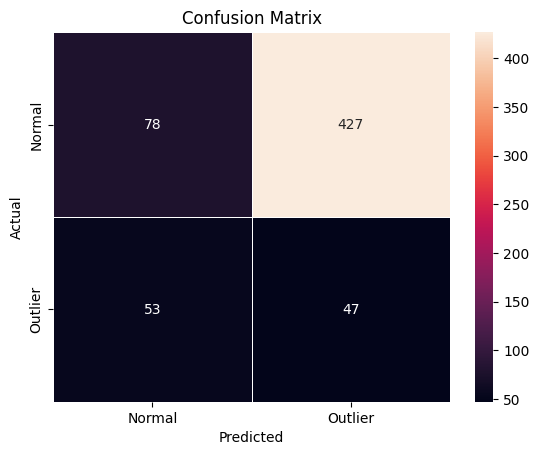

In [114]:
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_outlier and predictions are defined
y_pred = predictions  # Use the predictions from the KNN model

# Calculate F1 score
f1 = f1_score(y_outlier, y_pred)

# Print F1 score
print('F1 score: {:.4f}'.format(f1))

# Confusion matrix
cm = confusion_matrix(y_outlier, y_pred)
df_cm = pd.DataFrame(cm, index=['Normal', 'Outlier'], columns=['Normal', 'Outlier'])

# Plot confusion matrix
sns.heatmap(df_cm, annot=True, cbar=True, linewidths=.5, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


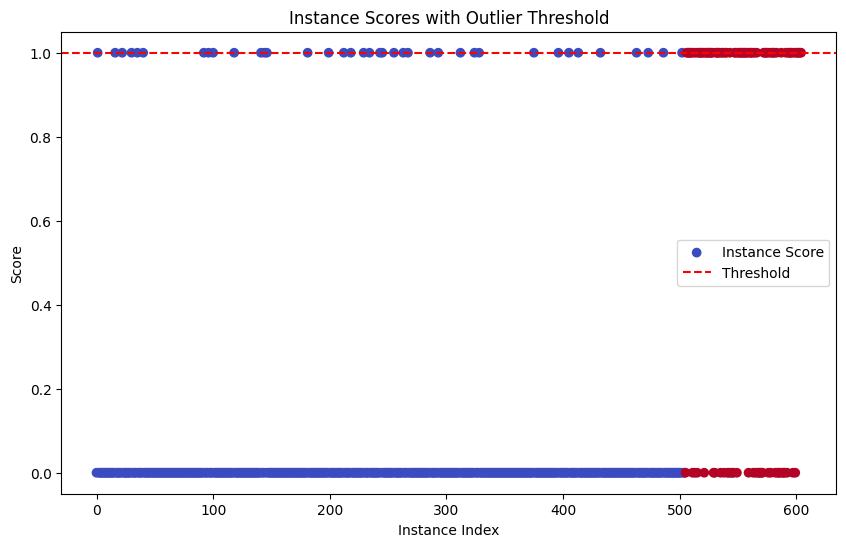

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming od_preds contains the instance scores
scores = od_preds  # Replace this with the actual scores from your KNN model

# Determine the threshold (e.g., using the 90th percentile)
threshold = np.percentile(scores, 90)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the scores
plt.scatter(range(len(scores)), scores, c=y_outlier, cmap='coolwarm', label='Instance Score')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Instance Scores with Outlier Threshold')
plt.xlabel('Instance Index')
plt.ylabel('Score')
plt.legend()
plt.show()


In [123]:
# Predicting outliers
y_pred = od.predict(X_outlier)

# Get the instance scores
scores = od.decision_scores_  # Assuming this attribute holds the scores

# Debugging: Check the lengths of labels and scores
print(f'Predictions Length: {len(y_pred)}')
print(f'Scores Length: {len(scores)}')
print(f'Labels Length: {len(y_outlier)}')

# Ensure the lengths match
if len(scores) != len(y_outlier):
    print(f'Warning: Inconsistent lengths! Scores: {len(scores)}, Labels: {len(y_outlier)}')
    # You can also truncate or pad one of the arrays if appropriate, but ensure it's logical to do so

# Prepare ROC data
roc_data = {
    'KNN': {'scores': scores, 'labels': y_outlier}
}

# Extract scores and labels
scores = roc_data['KNN']['scores']
labels = roc_data['KNN']['labels']

# Calculate ROC curve
try:
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
except ValueError as e:
    print(f'Error calculating ROC curve: {e}')


Predictions Length: 605
Scores Length: 505
Labels Length: 605
Error calculating ROC curve: Found input variables with inconsistent numbers of samples: [605, 505]


## Variable Auto-Encoders

Assume that a model is trained on normal instances of the dataset (not outliers) and standardization is applied:

In [124]:
np.random.seed(0)
normal_batch = create_outlier_batch(X, y, n_samples=100000, perc_outlier=0)
X_train, y_train = normal_batch.data.astype('float'), normal_batch.target
print(X_train.shape, y_train.shape)
print('{}% outliers'.format(100 * y_train.mean()))

AttributeError: 'tuple' object has no attribute 'data'

Apply standardization:

In [125]:
mean, stdev = X_train.mean(axis=0), X_train.std(axis=0)

In [126]:
X_train = (X_train - mean) / stdev

In [138]:
import pickle

# Save the model to disk
filename = 'logistic_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(logistic, file)

print(f"Model saved as {filename}")


Model saved as logistic_model.pkl


In [139]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Note: This is a mock-up of the trained model. In reality, you would load your saved model.
gb = GradientBoostingClassifier()
gb.fit(np.random.rand(1000, 10), np.random.randint(2, size=1000))

def get_float_input(prompt, min_value=0, max_value=None):
    while True:
        try:
            value = float(input(prompt))
            if value < min_value or (max_value is not None and value > max_value):
                raise ValueError
            return value
        except ValueError:
            print(f"Please enter a valid number between {min_value} and {max_value if max_value is not None else 'infinity'}.")

def get_int_input(prompt, min_value=0, max_value=None):
    while True:
        try:
            value = int(input(prompt))
            if value < min_value or (max_value is not None and value > max_value):
                raise ValueError
            return value
        except ValueError:
            print(f"Please enter a valid integer between {min_value} and {max_value if max_value is not None else 'infinity'}.")

def get_choice_input(prompt, choices):
    while True:
        value = input(prompt).upper()
        if value in choices:
            return value
        print(f"Please enter one of: {', '.join(choices)}")

def get_shot_data():
    print("Please enter the following shot information:")
    shot_data = {
        'shot_clock': get_float_input("Shot clock (0-24 seconds): ", 0, 24),
        'shot_dist': get_float_input("Shot distance (feet): ", 0),
        'close_def_dist': get_float_input("Closest defender distance (feet): ", 0),
        'period': get_int_input("Period (1-4): ", 1, 4),
        'touch_time': get_float_input("Touch time (seconds): ", 0),
        'dribbles': get_int_input("Number of dribbles: ", 0),
        'shot_number': get_int_input("Shot number for the player: ", 1),
        'pts_type': get_int_input("Points type (2 or 3): ", 2, 3),
        'location': get_choice_input("Location (H for Home, A for Away): ", ['H', 'A']),
        'w': get_choice_input("Currently winning? (W for Yes, L for No): ", ['W', 'L'])
    }
    return shot_data

def predict_shot(input_data):
    df = pd.DataFrame([input_data])
    df['location'] = np.where(df['location'] == 'H', 1, 0)
    df['w'] = np.where(df['w'] == 'W', 1, 0)
    
    prediction = gb.predict(df)
    probability = gb.predict_proba(df)[:, 1]
    
    return {
        'prediction': 'made' if prediction[0] == 1 else 'missed',
        'probability': float(probability[0])
    }

def main():
    while True:
        shot_data = get_shot_data()
        result = predict_shot(shot_data)
        
        print("\nShot Prediction:")
        print(f"The shot is predicted to be: {result['prediction']}")
        print(f"Probability of making the shot: {result['probability']:.2%}")
        
        if input("\nWould you like to predict another shot? (y/n): ").lower() != 'y':
            break

    print("Thank you for using the Shot Predictor!")

if __name__ == "__main__":
    main()

Please enter the following shot information:


/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/Users/sarthakagrawal/SkillPulse/yenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(



Shot Prediction:
The shot is predicted to be: made
Probability of making the shot: 88.26%
Thank you for using the Shot Predictor!
